# Linear Regression

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# inline plots
%matplotlib inline

In [40]:
housing_df = pd.read_csv("USA_Housing.csv")
housing_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [41]:
# column names renaming
housing_df.columns = housing_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace("\.", "")

housing_df.head()

,avg_area_income,avg_area_house_age,avg_area_number_of_rooms,avg_area_number_of_bedrooms,area_population,price,address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [42]:
# df metadata and summary sample statistics
print(housing_df.info())
print(housing_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
avg_area_income                5000 non-null float64
avg_area_house_age             5000 non-null float64
avg_area_number_of_rooms       5000 non-null float64
avg_area_number_of_bedrooms    5000 non-null float64
area_population                5000 non-null float64
price                          5000 non-null float64
address                        5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB
None
       avg_area_income  avg_area_house_age  avg_area_number_of_rooms  \
count      5000.000000         5000.000000               5000.000000   
mean      68583.108984            5.977222                  6.987792   
std       10657.991214            0.991456                  1.005833   
min       17796.631190            2.644304                  3.236194   
25%       61480.562388            5.322283                  6.299250   
50%       68804.286404           

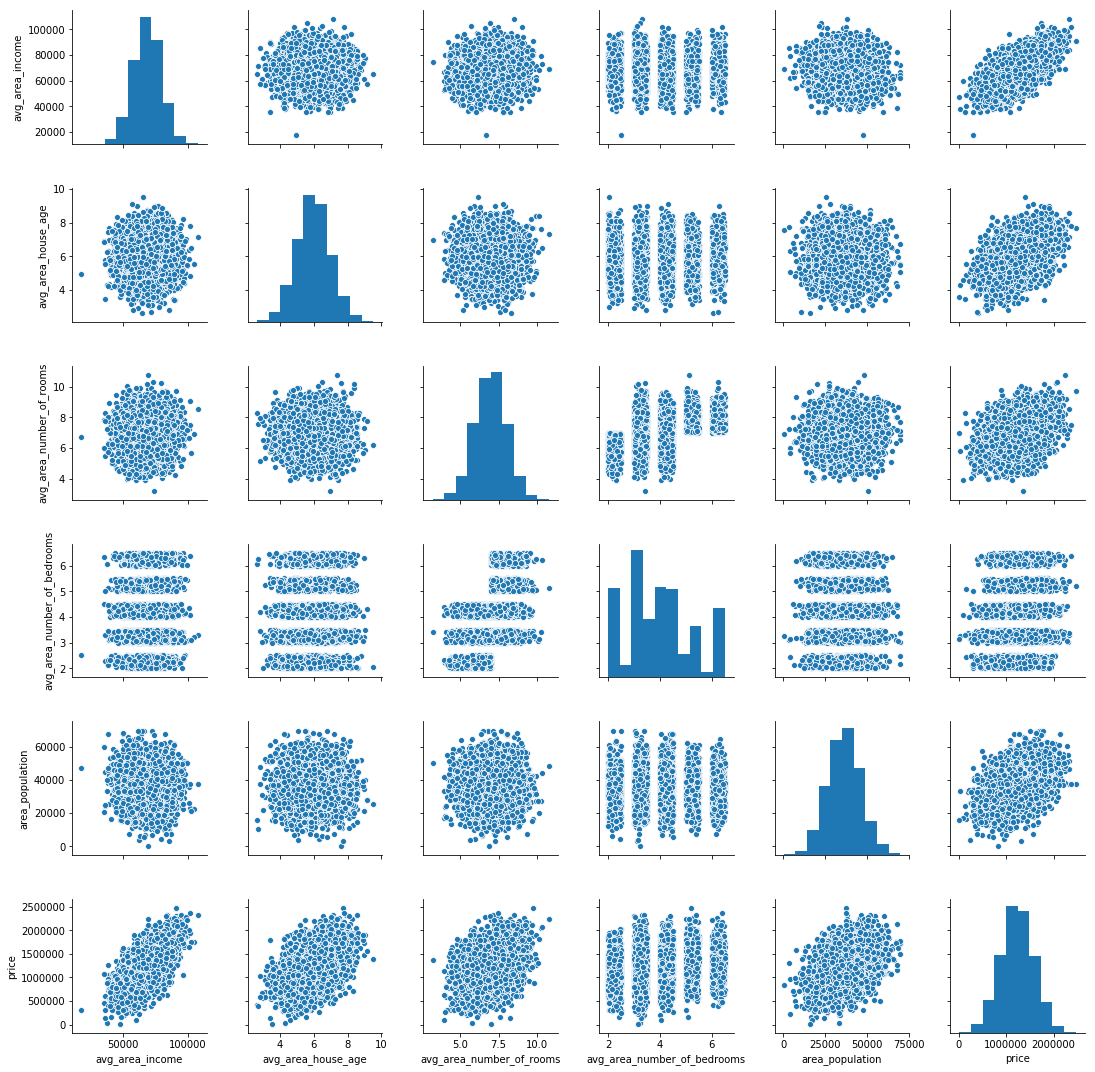

In [43]:
# quick glance at the data and its relatioships
sns.pairplot(data=housing_df)

### Pairplot analysis

By the looks of the pair plots, many variables here are normally distributed.
There seems to be a linear relationship between **Area Income/Price** and **House Age/Price** (lower).

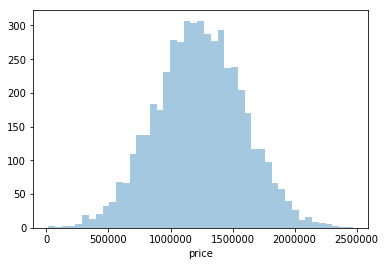

In [45]:
# frequency-based histogram
sns.distplot(housing_df["price"], norm_hist=False, kde=False)

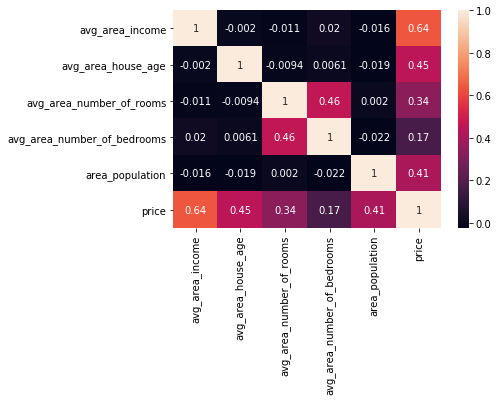

In [46]:
# pearson's correlation to see which variable is related to what
correlations = housing_df.corr()
sns.heatmap(correlations, annot=True)

### Correlation matrix analysis

Just as expected by the pairplots, there seems to be a rather linear relationship relationship between **Area Income/Price** and **House Age/Price** (Corr is high for area income and price). 

## Linear Regression Model

In [49]:
response_variable_series = housing_df["price"]
predictors_df = housing_df.loc[:, "avg_area_income": "avg_area_house_age"]